In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
userdf = pd.read_csv('data/ml-1m/users.dat',delimiter='::',header=None,engine='python')
traindf = pd.read_csv('data/ml-1m/train.dat',delimiter=',',header=None,engine='python')
testdf = pd.read_csv('data/ml-1m/test.dat',delimiter=',',header=None,engine='python')
ratedf = pd.read_csv('data/ml-1m/ratings.dat',delimiter='::',header=None,engine='python')
moviedf = pd.read_csv('data/ml-1m/movies.dat',index_col=0,delimiter='::',header=None,engine='python')

In [6]:
# group rating by user  ID
user_gb = ratedf[2].groupby(ratedf[0])
female = list()
male = list()
x = np.zeros(6040)
y = np.zeros(6040)
for i in range(1,6041):
    rate = ratedf.loc[user_gb.groups[i]][2].mean()
    y[i-1] = rate
    if (userdf.loc[i-1])[1]=='F':
        female.append(rate)
        x[i-1] = 1
    else: male.append(rate)
    
# # group rating by movie
# movie_gb = ratedf.groupby(1)
# # true rating
# test_y = testdf[2]
# movies = set(traindf[1])

In [7]:
from scipy.stats import ttest_ind
ttest_ind(np.array(female),np.array(male),equal_var=False)

Ttest_indResult(statistic=3.1107603650137001, pvalue=0.001882101864779079)

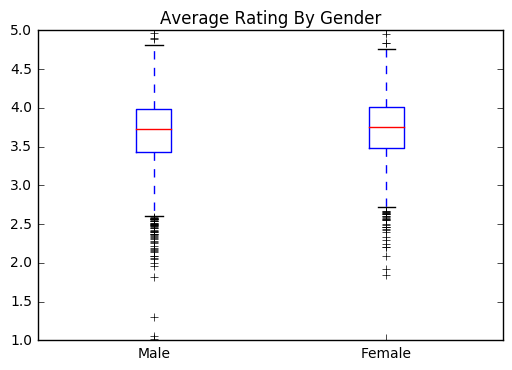

In [8]:
plt.boxplot([male,female])
plt.xticks([1, 2], ['Male', 'Female'])
plt.title('Average Rating By Gender')
plt.show()

In [167]:
age_dict = dict()
for i in [1,18,25,35,45,50,56]:
    age_dict[i]=list()
for i in range(1,6041):
    rate = ratedf.loc[user_gb.groups[i]][2].mean()
    age_dict[(userdf.loc[i-1])[2]].append(rate)
import operator
age_dict = sorted(age_dict.items(), key=operator.itemgetter(0))

In [168]:
ages = [v[1] for v in age_dict]
for i in range(7):
    for j in range(7):
        if j > i: 
            t,p = ttest_ind(np.array(ages[i]),np.array(ages[j]),equal_var=False)
            print i,j,p

0 1 0.99109038984
0 2 0.156987507138
0 3 0.000345206461194
0 4 4.19270238447e-05
0 5 2.70360772246e-06
0 6 9.56205932059e-08
1 2 0.00377566931131
1 3 1.20680559166e-11
1 4 1.82531305707e-11
1 5 5.0541177998e-14
1 6 1.09659247046e-14
2 3 4.7824115739e-07
2 4 2.22189887885e-07
2 5 9.1824638934e-10
2 6 8.21913685205e-11
3 4 0.19486828815
3 5 0.01832292423
3 6 0.000586197761593
4 5 0.337827068173
4 6 0.0310929064853
5 6 0.194568831644


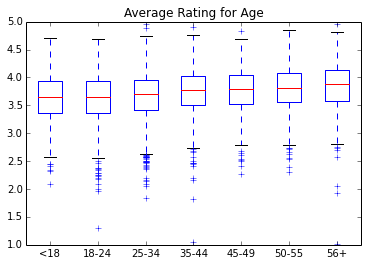

In [170]:
plt.boxplot([v[1] for v in age_dict])
plt.xticks([1, 2,3,4,5,6,7], ['<18','18-24','25-34','35-44','45-49','50-55','56+'])
plt.title('Average Rating for Age')

plt.show()

In [126]:
occ_dict = dict()
for i in range(21):
    occ_dict[i]=list()
for i in range(1,6041):
    rate = ratedf.loc[user_gb.groups[i]][2].mean()
    occ_dict[(userdf.loc[i-1])[3]].append(rate)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


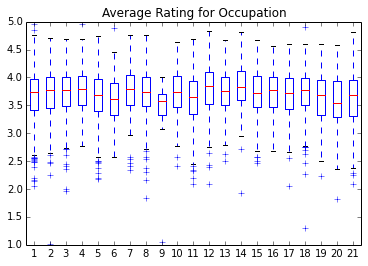

In [128]:
plt.boxplot([v for v in occ_dict.itervalues()])
plt.title('Average Rating for Occupation')
plt.show()

In [129]:
genres=['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama',\
 'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
for g in genres:
    moviedf[g] = np.zeros(len(moviedf))

for index in moviedf.index:
    genres = moviedf.loc[index][2].split('|')
    for genre in genres:
        (moviedf[genre]).loc[index]=1


/Library/Python/2.7/site-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


NameError: name 're' is not defined

In [130]:
import re
pat = re.compile("\(([0-9]+)\)")
print pat.search('aaa(1995)').group(1)
years = [(int(pat.search(s).group(1)[2:])-1)/10 for s in moviedf[1]]
years = [9 if x==-1 else x for x in years]
moviedf['year'] = years
moviedf = pd.concat([moviedf,pd.get_dummies(moviedf['year'],prefix='year')],axis=1)
moviedf = moviedf.drop('year',axis=1)
moviedf.tail()
print moviedf.tail()

1995
                               1               2  Action  Adventure  \
0                                                                     
3948     Meet the Parents (2000)          Comedy     0.0        0.0   
3949  Requiem for a Dream (2000)           Drama     0.0        0.0   
3950            Tigerland (2000)           Drama     0.0        0.0   
3951     Two Family House (2000)           Drama     0.0        0.0   
3952       Contender, The (2000)  Drama|Thriller     0.0        0.0   

      Animation  Children's  Comedy  Crime  Documentary  Drama   ...    \
0                                                                ...     
3948        0.0         0.0     1.0    0.0          0.0    0.0   ...     
3949        0.0         0.0     0.0    0.0          0.0    1.0   ...     
3950        0.0         0.0     0.0    0.0          0.0    1.0   ...     
3951        0.0         0.0     0.0    0.0          0.0    1.0   ...     
3952        0.0         0.0     0.0    0.0          0

In [143]:
movie_gb = ratedf[2].groupby(ratedf[1])

In [ ]:
genre_dict = dict()
for g in genres:
    genre_dict[g]=list()
for g in genres[:1]:
    index = moviedf.index[moviedf[g].nonzero()[0]]
    print len(index)
    for i in index:
        if i in list(movie_gb.keys): genre_dict[g].append(ratedf.loc[movie_gb.groups[i]][2].mean())

1603
